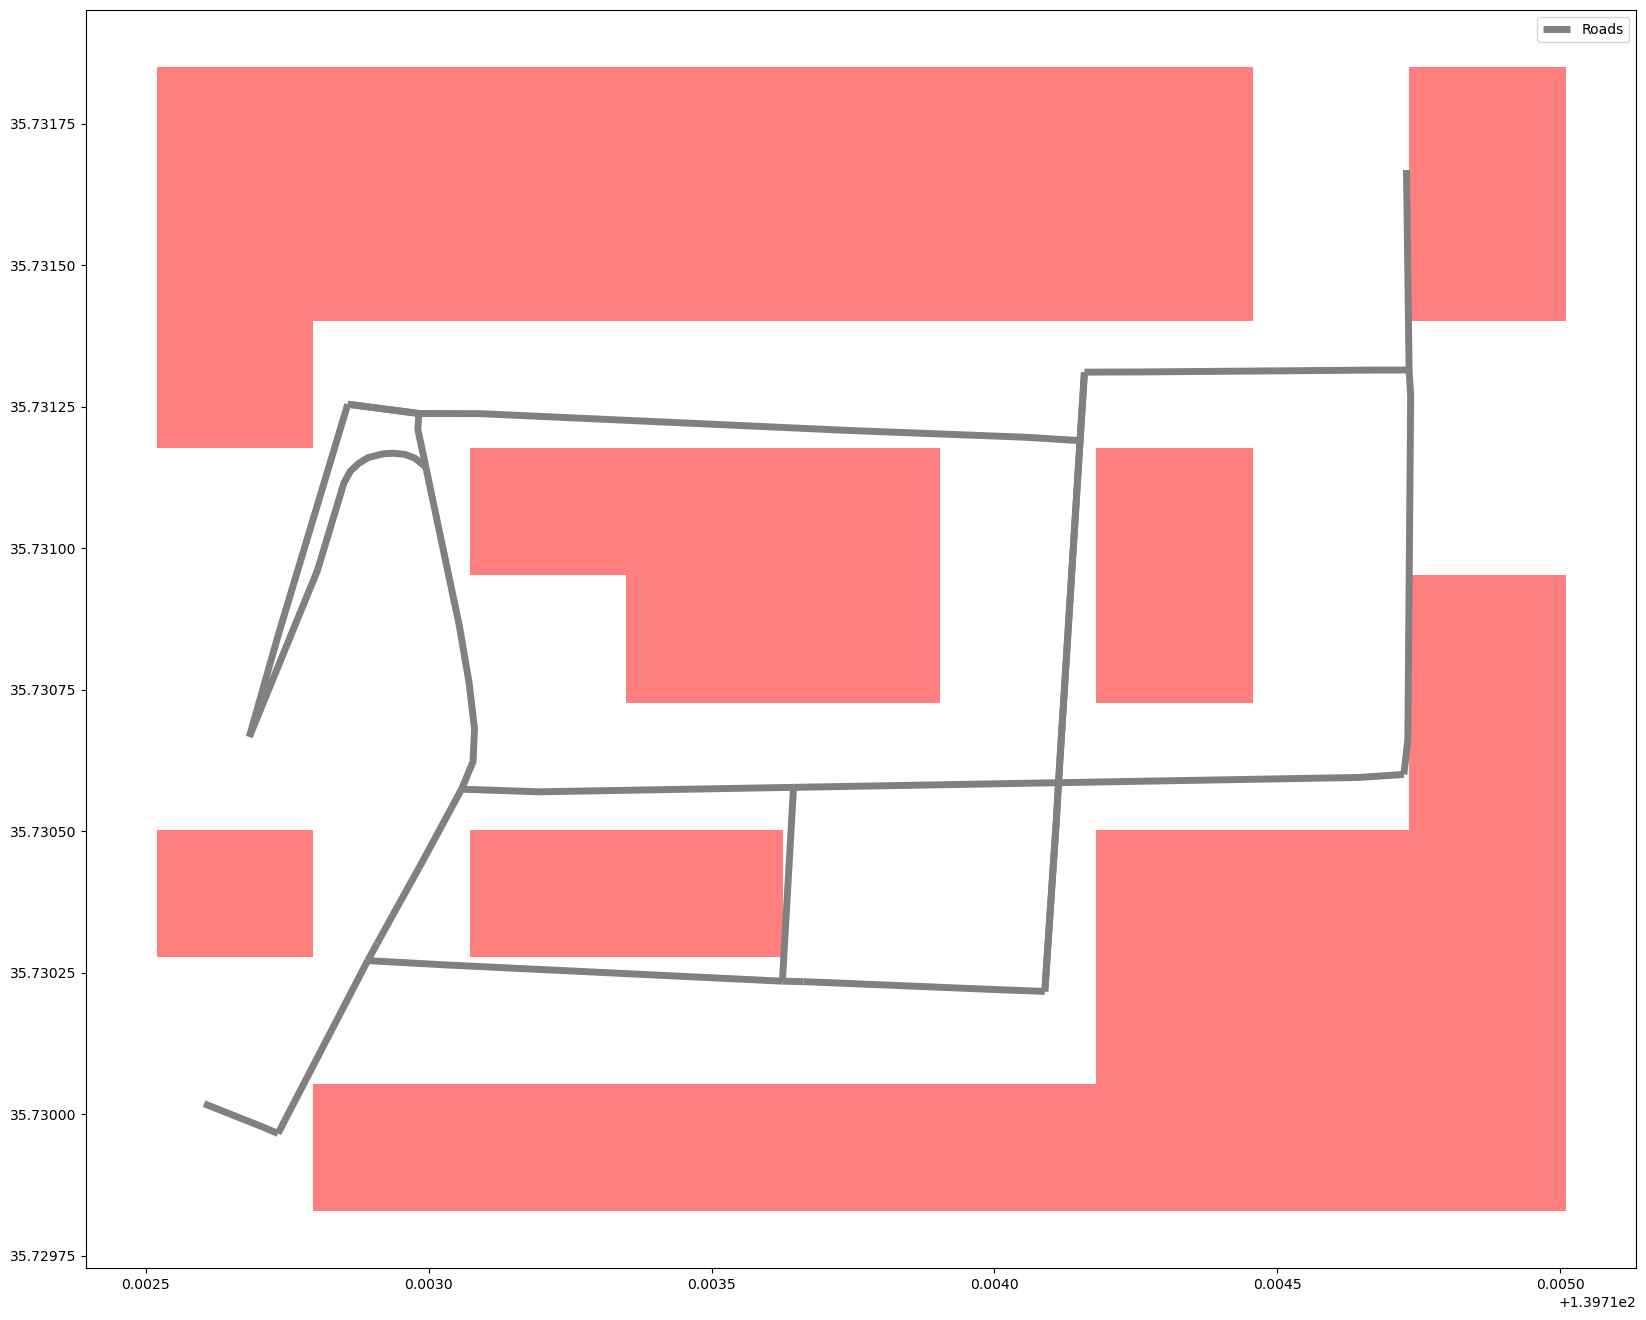

In [4]:
def create_grid(lat_range, lon_range, meter_width, meter_height):
    # 地球の半径（メートル単位）
    R = 6378137
    # 1度あたりのメートル数（緯度）
    m_per_deg_lat = np.pi * R / 180
    # 1度あたりのメートル数（経度）; 緯度の平均を取っています
    m_per_deg_lon = m_per_deg_lat * np.cos(np.radians((lat_range[0] + lat_range[1]) / 2))

    # ステップサイズを計算（度数）
    lat_step = meter_height / m_per_deg_lat
    lon_step = meter_width / m_per_deg_lon

    # グリッドの行数と列数を計算
    rows = int(np.ceil((lat_range[1] - lat_range[0]) / lat_step))
    cols = int(np.ceil((lon_range[1] - lon_range[0]) / lon_step))

    grid = []
    for i in range(rows):
        for j in range(cols):
            grid.append({
                'geometry': box(lon_range[0] + j * lon_step,
                                lat_range[0] + i * lat_step,
                                lon_range[0] + (j + 1) * lon_step,
                                lat_range[0] + (i + 1) * lat_step),
                'row': i + 1,
                'col': j + 1
            })
    return gpd.GeoDataFrame(grid, columns=['geometry', 'row', 'col'])

# メッシュの幅と高さをメートルで指定
meter_width = 25  # 25メートル幅
meter_height = 25  # 25メートル高さ

# 新しいグリッドを生成
grid_gdf = create_grid(latitude_range, longitude_range, meter_width, meter_height)
grid_gdf['has_road'] = grid_gdf.geometry.apply(lambda cell: road_geometries.intersects(cell).any())
obstacles_gdf = grid_gdf[~grid_gdf['has_road']]

obstacles = set((row['col'], row['row']) for idx, row in grid_gdf[~grid_gdf['has_road']].iterrows())

# 道路データとオブスタクルズの表示
fig, ax = plt.subplots(figsize=(20, 20))
road_geometries.plot(ax=ax, color='gray', linewidth=5, label='Roads')
obstacles_gdf.plot(ax=ax, color='red', alpha=0.5, label='Obstacles')
plt.legend()
plt.show()


In [5]:
obstacles

{(1, 3),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 1),
 (2, 8),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 6),
 (3, 8),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 8),
 (4, 9),
 (5, 1),
 (5, 5),
 (5, 6),
 (5, 8),
 (5, 9),
 (6, 1),
 (6, 8),
 (6, 9),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (8, 1),
 (8, 2),
 (8, 3),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 8),
 (9, 9)}